In [56]:
import keras
from keras.datasets import mnist
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [57]:
from keras import backend as K
K._get_available_gpus()

[]

In [58]:
# Get the data, train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Use 20% of the train data as validation
x_train, x_validation, y_train, y_validation = train_test_split(
    x_train, y_train, test_size=0.2, random_state=69
)

print(f"We have {x_train.shape[0]} images of size {x_train.shape[1]}x{x_train.shape[2]} for training!")

print(f"We have {x_validation.shape[0]} images of size {x_validation.shape[1]}x{x_validation.shape[2]} for validation!")

print(f"We have {x_test.shape[0]} images of size {x_test.shape[1]}x{x_test.shape[2]} for testing!")

We have 48000 images of size 28x28 for training!
We have 12000 images of size 28x28 for validation!
We have 10000 images of size 28x28 for testing!


In [59]:
#Reshape
input_shape = (28, 28, 1)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_validation = x_validation.reshape(x_validation.shape[0], 28, 28, 1)

#PARA FICAR COM ONE HOT ENCONDING, PODEMOS NAO USAR E MUDAMOS SO A LOSS FUNCTION
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_validation = keras.utils.to_categorical(y_validation, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')
x_test = x_test.astype('float32')

#NORMALIZAR
x_train /= 255
x_validation /= 255
x_test /= 255

print('x_train shape:', x_train.shape)

x_train shape: (48000, 28, 28, 1)


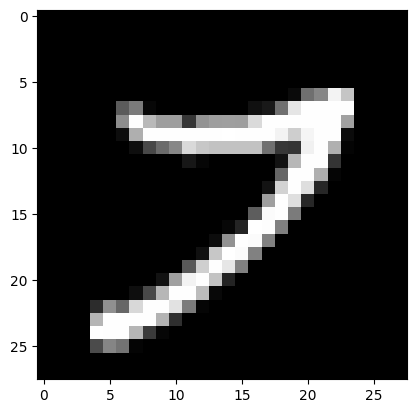

In [60]:
plt.imshow(x_train[1430], cmap='gray')
plt.show()

In [41]:
batch_size = 128
num_classes = 10
epochs = 10

In [42]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [43]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [51]:
#No meu pc (andre) demora tipo 2m30s
history = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_validation, y_validation))

Epoch 1/10
375/375 [==============================] - 17s 45ms/step - loss: 2.2179 - accuracy: 0.1978 - val_loss: 2.1932 - val_accuracy: 0.2868
Epoch 2/10
375/375 [==============================] - 17s 46ms/step - loss: 2.2063 - accuracy: 0.2069 - val_loss: 2.1790 - val_accuracy: 0.2903
Epoch 3/10
375/375 [==============================] - 15s 41ms/step - loss: 2.1942 - accuracy: 0.2080 - val_loss: 2.1639 - val_accuracy: 0.2942
Epoch 4/10
375/375 [==============================] - 18s 47ms/step - loss: 2.1813 - accuracy: 0.2182 - val_loss: 2.1478 - val_accuracy: 0.3000
Epoch 5/10
375/375 [==============================] - 17s 46ms/step - loss: 2.1675 - accuracy: 0.2247 - val_loss: 2.1306 - val_accuracy: 0.3079
Epoch 6/10
375/375 [==============================] - 15s 41ms/step - loss: 2.1533 - accuracy: 0.2304 - val_loss: 2.1124 - val_accuracy: 0.3176
Epoch 7/10
375/375 [==============================] - 15s 41ms/step - loss: 2.1384 - accuracy: 0.2379 - val_loss: 2.0934 - val_accuracy:

Validation: acc is 41.083332896232605% and loss is 2.0308308601379395


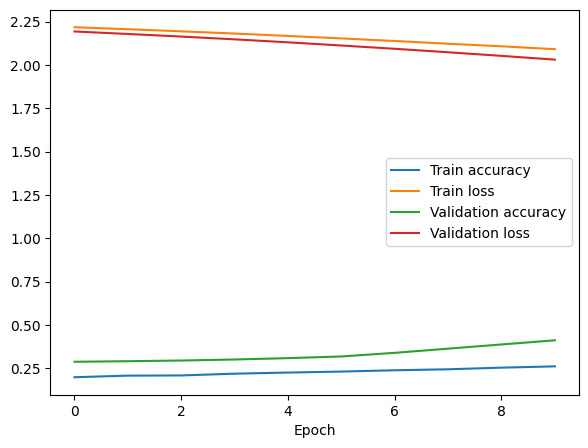

In [52]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train accuracy")
plt.plot(history.history["loss"], label="Train loss")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.xlabel("Epoch")
plt.legend(loc="best")

validation_loss, validation_acc = model.evaluate(x_validation, y_validation, verbose=False)

print(f"Validation: acc is {validation_acc*100}% and loss is {validation_loss}")

In [53]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.022592306137085
Test accuracy: 0.43290001153945923
